In [1]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
from d2l import torch as d2l
from IPython import display

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# 从CSV文件中读取数据
data_file = "./Data/all_records_g18.csv"
data = pd.read_csv(data_file)
label_Original_SpeedData = data["Original_SpeedData"]
label_Original_TorqueData = data["Original_TorqueData"]
label_Original_AngleData = data["Original_AngleData"]
label_label = data["File_Name"]

In [4]:
# 合并部分标签
label_simplified = []
for i in range(len(label_label)):
    label_split = label_label[i].split(sep='-')
    label_simple = label_split[2]
    label_simplified.append(label_simple)
    
label_simplified = pd.Series(label_simplified)

In [5]:
# 标签值数值化
encoder = LabelEncoder()
label_encoded = encoder.fit_transform(label_simplified)
label = pd.DataFrame({"label": [label_encoded[i] for i in range(len(label_encoded))]},
                        columns=["label"])

In [6]:
# 解码获得标签值
def get_label(y):
    return list(encoder.inverse_transform(y))


In [7]:
# 将Original_SpeedData等数据转化为列表形式，方便之后的操作
def extract(original):
    data_after_extract = []
    min_len = 0
    for i in range(len(original)):
        lst = original[i].split(sep=',')
        lst[0] = lst[0][1::]
        lst.pop()
        if min_len > len(lst) or min_len == 0:
            min_len = len(lst)
        data_after_extract.append(lst)
    for i in range(len(data_after_extract)):
        data_after_extract[i] = data_after_extract[i][:min_len:]
        for j in range(len(data_after_extract[i])):
            data_after_extract[i][j] = int(data_after_extract[i][j])
    return data_after_extract

Original_SpeedData = extract(label_Original_SpeedData)
Original_TorqueData = extract(label_Original_TorqueData)
Original_AngleData = extract(label_Original_AngleData)


Original_SpeedData_df = pd.DataFrame({"Original_SpeedData0": [Original_SpeedData[i][0] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData1": [Original_SpeedData[i][1] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData2": [Original_SpeedData[i][2] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData3": [Original_SpeedData[i][3] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData4": [Original_SpeedData[i][4] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData5": [Original_SpeedData[i][5] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData6": [Original_SpeedData[i][6] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData7": [Original_SpeedData[i][7] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData8": [Original_SpeedData[i][8] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData9": [Original_SpeedData[i][9] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData10": [Original_SpeedData[i][10] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData11": [Original_SpeedData[i][11] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData12": [Original_SpeedData[i][12] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData13": [Original_SpeedData[i][13] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData14": [Original_SpeedData[i][14] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData15": [Original_SpeedData[i][15] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData16": [Original_SpeedData[i][16] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData17": [Original_SpeedData[i][17] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData18": [Original_SpeedData[i][18] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData19": [Original_SpeedData[i][19] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData20": [Original_SpeedData[i][20] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData21": [Original_SpeedData[i][21] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData22": [Original_SpeedData[i][22] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData23": [Original_SpeedData[i][23] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData24": [Original_SpeedData[i][24] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData25": [Original_SpeedData[i][25] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData26": [Original_SpeedData[i][26] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData27": [Original_SpeedData[i][27] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData28": [Original_SpeedData[i][28] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData29": [Original_SpeedData[i][29] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData30": [Original_SpeedData[i][30] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData31": [Original_SpeedData[i][31] for i in range(len(Original_SpeedData))],
                                      "Original_SpeedData32": [Original_SpeedData[i][32] for i in range(len(Original_SpeedData))]},
                           columns=["Original_SpeedData0", "Original_SpeedData1", "Original_SpeedData2", "Original_SpeedData3", "Original_SpeedData4", "Original_SpeedData5",
                                      "Original_SpeedData6", "Original_SpeedData7", "Original_SpeedData8", "Original_SpeedData9", "Original_SpeedData10", "Original_SpeedData11",
                                      "Original_SpeedData12", "Original_SpeedData13", "Original_SpeedData14", "Original_SpeedData15", "Original_SpeedData16", "Original_SpeedData17",
                                      "Original_SpeedData18", "Original_SpeedData19", "Original_SpeedData20", "Original_SpeedData21", "Original_SpeedData22", "Original_SpeedData23",
                                      "Original_SpeedData24", "Original_SpeedData25", "Original_SpeedData26", "Original_SpeedData27", "Original_SpeedData28", "Original_SpeedData29",
                                      "Original_SpeedData30", "Original_SpeedData31", "Original_SpeedData32"])
Original_TorqueData_df = pd.DataFrame({"Original_TorqueData0": [Original_TorqueData[i][0] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData1": [Original_TorqueData[i][1] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData2": [Original_TorqueData[i][2] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData3": [Original_TorqueData[i][3] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData4": [Original_TorqueData[i][4] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData5": [Original_TorqueData[i][5] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData6": [Original_TorqueData[i][6] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData7": [Original_TorqueData[i][7] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData8": [Original_TorqueData[i][8] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData9": [Original_TorqueData[i][9] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData10": [Original_TorqueData[i][10] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData11": [Original_TorqueData[i][11] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData12": [Original_TorqueData[i][12] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData13": [Original_TorqueData[i][13] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData14": [Original_TorqueData[i][14] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData15": [Original_TorqueData[i][15] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData16": [Original_TorqueData[i][16] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData17": [Original_TorqueData[i][17] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData18": [Original_TorqueData[i][18] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData19": [Original_TorqueData[i][19] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData20": [Original_TorqueData[i][20] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData21": [Original_TorqueData[i][21] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData22": [Original_TorqueData[i][22] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData23": [Original_TorqueData[i][23] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData24": [Original_TorqueData[i][24] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData25": [Original_TorqueData[i][25] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData26": [Original_TorqueData[i][26] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData27": [Original_TorqueData[i][27] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData28": [Original_TorqueData[i][28] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData29": [Original_TorqueData[i][29] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData30": [Original_TorqueData[i][30] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData31": [Original_TorqueData[i][31] for i in range(len(Original_TorqueData))],
                                      "Original_TorqueData32": [Original_TorqueData[i][32] for i in range(len(Original_TorqueData))]},
                           columns=["Original_TorqueData0", "Original_TorqueData1", "Original_TorqueData2", "Original_TorqueData3", "Original_TorqueData4", "Original_TorqueData5",
                                      "Original_TorqueData6", "Original_TorqueData7", "Original_TorqueData8", "Original_TorqueData9", "Original_TorqueData10", "Original_TorqueData11",
                                      "Original_TorqueData12", "Original_TorqueData13", "Original_TorqueData14", "Original_TorqueData15", "Original_TorqueData16", "Original_TorqueData17",
                                      "Original_TorqueData18", "Original_TorqueData19", "Original_TorqueData20", "Original_TorqueData21", "Original_TorqueData22", "Original_TorqueData23",
                                      "Original_TorqueData24", "Original_TorqueData25", "Original_TorqueData26", "Original_TorqueData27", "Original_TorqueData28", "Original_TorqueData29",
                                      "Original_TorqueData30", "Original_TorqueData31","Original_TorqueData32"])
Original_AngleData_df = pd.DataFrame({"Original_AngleData0": [Original_AngleData[i][0] for i in range(len(Original_AngleData))],
                                      "Original_AngleData1": [Original_AngleData[i][1] for i in range(len(Original_AngleData))],
                                      "Original_AngleData2": [Original_AngleData[i][2] for i in range(len(Original_AngleData))],
                                      "Original_AngleData3": [Original_AngleData[i][3] for i in range(len(Original_AngleData))],
                                      "Original_AngleData4": [Original_AngleData[i][4] for i in range(len(Original_AngleData))],
                                      "Original_AngleData5": [Original_AngleData[i][5] for i in range(len(Original_AngleData))],
                                      "Original_AngleData6": [Original_AngleData[i][6] for i in range(len(Original_AngleData))],
                                      "Original_AngleData7": [Original_AngleData[i][7] for i in range(len(Original_AngleData))],
                                      "Original_AngleData8": [Original_AngleData[i][8] for i in range(len(Original_AngleData))],
                                      "Original_AngleData9": [Original_AngleData[i][9] for i in range(len(Original_AngleData))],
                                      "Original_AngleData10": [Original_AngleData[i][10] for i in range(len(Original_AngleData))],
                                      "Original_AngleData11": [Original_AngleData[i][11] for i in range(len(Original_AngleData))],
                                      "Original_AngleData12": [Original_AngleData[i][12] for i in range(len(Original_AngleData))],
                                      "Original_AngleData13": [Original_AngleData[i][13] for i in range(len(Original_AngleData))],
                                      "Original_AngleData14": [Original_AngleData[i][14] for i in range(len(Original_AngleData))],
                                      "Original_AngleData15": [Original_AngleData[i][15] for i in range(len(Original_AngleData))],
                                      "Original_AngleData16": [Original_AngleData[i][16] for i in range(len(Original_AngleData))],
                                      "Original_AngleData17": [Original_AngleData[i][17] for i in range(len(Original_AngleData))],
                                      "Original_AngleData18": [Original_AngleData[i][18] for i in range(len(Original_AngleData))],
                                      "Original_AngleData19": [Original_AngleData[i][19] for i in range(len(Original_AngleData))],
                                      "Original_AngleData20": [Original_AngleData[i][20] for i in range(len(Original_AngleData))],
                                      "Original_AngleData21": [Original_AngleData[i][21] for i in range(len(Original_AngleData))],
                                      "Original_AngleData22": [Original_AngleData[i][22] for i in range(len(Original_AngleData))],
                                      "Original_AngleData23": [Original_AngleData[i][23] for i in range(len(Original_AngleData))],
                                      "Original_AngleData24": [Original_AngleData[i][24] for i in range(len(Original_AngleData))],
                                      "Original_AngleData25": [Original_AngleData[i][25] for i in range(len(Original_AngleData))],
                                      "Original_AngleData26": [Original_AngleData[i][26] for i in range(len(Original_AngleData))],
                                      "Original_AngleData27": [Original_AngleData[i][27] for i in range(len(Original_AngleData))],
                                      "Original_AngleData28": [Original_AngleData[i][28] for i in range(len(Original_AngleData))],
                                      "Original_AngleData29": [Original_AngleData[i][29] for i in range(len(Original_AngleData))],
                                      "Original_AngleData30": [Original_AngleData[i][30] for i in range(len(Original_AngleData))],
                                      "Original_AngleData31": [Original_AngleData[i][31] for i in range(len(Original_AngleData))],
                                      "Original_AngleData32": [Original_AngleData[i][32] for i in range(len(Original_AngleData))]},
                           columns=["Original_AngleData0", "Original_AngleData1", "Original_AngleData2", "Original_AngleData3", "Original_AngleData4", "Original_AngleData5",
                                    "Original_AngleData6", "Original_AngleData7", "Original_AngleData8", "Original_AngleData9", "Original_AngleData10", "Original_AngleData11",
                                    "Original_AngleData12", "Original_AngleData13", "Original_AngleData14", "Original_AngleData15", "Original_AngleData16", "Original_AngleData17",
                                    "Original_AngleData18", "Original_AngleData19", "Original_AngleData20", "Original_AngleData21", "Original_AngleData22", "Original_AngleData23",
                                    "Original_AngleData24", "Original_AngleData25", "Original_AngleData26", "Original_AngleData27", "Original_AngleData28", "Original_AngleData29",
                                    "Original_AngleData30", "Original_AngleData31", "Original_AngleData32"])


In [8]:
# 归一化属性
scaler = MinMaxScaler()
Original_SpeedData_df[["Original_SpeedData0", "Original_SpeedData1", "Original_SpeedData2", "Original_SpeedData3", "Original_SpeedData4", "Original_SpeedData5",
                                      "Original_SpeedData6", "Original_SpeedData7", "Original_SpeedData8", "Original_SpeedData9", "Original_SpeedData10", "Original_SpeedData11",
                                      "Original_SpeedData12", "Original_SpeedData13", "Original_SpeedData14", "Original_SpeedData15", "Original_SpeedData16", "Original_SpeedData17",
                                      "Original_SpeedData18", "Original_SpeedData19", "Original_SpeedData20", "Original_SpeedData21", "Original_SpeedData22", "Original_SpeedData23",
                                      "Original_SpeedData24", "Original_SpeedData25", "Original_SpeedData26", "Original_SpeedData27", "Original_SpeedData28", "Original_SpeedData29",
                                      "Original_SpeedData30", "Original_SpeedData31", "Original_SpeedData32"]] \
                    = scaler.fit_transform(Original_SpeedData_df[["Original_SpeedData0", "Original_SpeedData1", "Original_SpeedData2", "Original_SpeedData3", "Original_SpeedData4", "Original_SpeedData5",
                                      "Original_SpeedData6", "Original_SpeedData7", "Original_SpeedData8", "Original_SpeedData9", "Original_SpeedData10", "Original_SpeedData11",
                                      "Original_SpeedData12", "Original_SpeedData13", "Original_SpeedData14", "Original_SpeedData15", "Original_SpeedData16", "Original_SpeedData17",
                                      "Original_SpeedData18", "Original_SpeedData19", "Original_SpeedData20", "Original_SpeedData21", "Original_SpeedData22", "Original_SpeedData23",
                                      "Original_SpeedData24", "Original_SpeedData25", "Original_SpeedData26", "Original_SpeedData27", "Original_SpeedData28", "Original_SpeedData29",
                                      "Original_SpeedData30", "Original_SpeedData31", "Original_SpeedData32"]])

Original_TorqueData_df[["Original_TorqueData0", "Original_TorqueData1", "Original_TorqueData2", "Original_TorqueData3", "Original_TorqueData4", "Original_TorqueData5",
                                      "Original_TorqueData6", "Original_TorqueData7", "Original_TorqueData8", "Original_TorqueData9", "Original_TorqueData10", "Original_TorqueData11",
                                      "Original_TorqueData12", "Original_TorqueData13", "Original_TorqueData14", "Original_TorqueData15", "Original_TorqueData16", "Original_TorqueData17",
                                      "Original_TorqueData18", "Original_TorqueData19", "Original_TorqueData20", "Original_TorqueData21", "Original_TorqueData22", "Original_TorqueData23",
                                      "Original_TorqueData24", "Original_TorqueData25", "Original_TorqueData26", "Original_TorqueData27", "Original_TorqueData28", "Original_TorqueData29",
                                      "Original_TorqueData30", "Original_TorqueData31","Original_TorqueData32"]] \
                    = scaler.fit_transform(Original_TorqueData_df[["Original_TorqueData0", "Original_TorqueData1", "Original_TorqueData2", "Original_TorqueData3", "Original_TorqueData4", "Original_TorqueData5",
                                      "Original_TorqueData6", "Original_TorqueData7", "Original_TorqueData8", "Original_TorqueData9", "Original_TorqueData10", "Original_TorqueData11",
                                      "Original_TorqueData12", "Original_TorqueData13", "Original_TorqueData14", "Original_TorqueData15", "Original_TorqueData16", "Original_TorqueData17",
                                      "Original_TorqueData18", "Original_TorqueData19", "Original_TorqueData20", "Original_TorqueData21", "Original_TorqueData22", "Original_TorqueData23",
                                      "Original_TorqueData24", "Original_TorqueData25", "Original_TorqueData26", "Original_TorqueData27", "Original_TorqueData28", "Original_TorqueData29",
                                      "Original_TorqueData30", "Original_TorqueData31","Original_TorqueData32"]])

Original_AngleData_df[["Original_AngleData0", "Original_AngleData1", "Original_AngleData2", "Original_AngleData3", "Original_AngleData4", "Original_AngleData5",
                                    "Original_AngleData6", "Original_AngleData7", "Original_AngleData8", "Original_AngleData9", "Original_AngleData10", "Original_AngleData11",
                                    "Original_AngleData12", "Original_AngleData13", "Original_AngleData14", "Original_AngleData15", "Original_AngleData16", "Original_AngleData17",
                                    "Original_AngleData18", "Original_AngleData19", "Original_AngleData20", "Original_AngleData21", "Original_AngleData22", "Original_AngleData23",
                                    "Original_AngleData24", "Original_AngleData25", "Original_AngleData26", "Original_AngleData27", "Original_AngleData28", "Original_AngleData29",
                                    "Original_AngleData30", "Original_AngleData31", "Original_AngleData32"]] \
                    = scaler.fit_transform(Original_AngleData_df[["Original_AngleData0", "Original_AngleData1", "Original_AngleData2", "Original_AngleData3", "Original_AngleData4", "Original_AngleData5",
                                    "Original_AngleData6", "Original_AngleData7", "Original_AngleData8", "Original_AngleData9", "Original_AngleData10", "Original_AngleData11",
                                    "Original_AngleData12", "Original_AngleData13", "Original_AngleData14", "Original_AngleData15", "Original_AngleData16", "Original_AngleData17",
                                    "Original_AngleData18", "Original_AngleData19", "Original_AngleData20", "Original_AngleData21", "Original_AngleData22", "Original_AngleData23",
                                    "Original_AngleData24", "Original_AngleData25", "Original_AngleData26", "Original_AngleData27", "Original_AngleData28", "Original_AngleData29",
                                    "Original_AngleData30", "Original_AngleData31", "Original_AngleData32"]])


In [9]:
# 拼接特征
features = pd.concat([Original_SpeedData_df, Original_TorqueData_df, Original_AngleData_df], axis=1)


In [10]:
# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)


In [31]:
features

,Original_SpeedData0,Original_SpeedData1,Original_SpeedData2,Original_SpeedData3,Original_SpeedData4,Original_SpeedData5,Original_SpeedData6,Original_SpeedData7,Original_SpeedData8,Original_SpeedData9,...,Original_AngleData23,Original_AngleData24,Original_AngleData25,Original_AngleData26,Original_AngleData27,Original_AngleData28,Original_AngleData29,Original_AngleData30,Original_AngleData31,Original_AngleData32
0,0.826446,0.376256,0.211670,0.216622,0.175197,0.088717,0.038684,0.042308,0.033271,0.028582,...,0.989419,0.988853,0.987200,0.986892,0.986316,0.985726,0.985962,0.985923,0.985608,0.985837
1,0.876033,0.411872,0.689013,0.782306,0.860236,0.826206,0.877279,0.842692,0.788037,0.781769,...,0.047206,0.048940,0.051198,0.053523,0.055556,0.057919,0.060006,0.062655,0.065043,0.067481
2,0.876033,0.416438,0.628802,0.795174,0.856299,0.839854,0.883059,0.819231,0.784299,0.777907,...,0.046663,0.048396,0.050926,0.052977,0.055008,0.057370,0.060006,0.062103,0.064766,0.066926
3,0.793388,0.381735,0.271881,0.213405,0.227854,0.149682,0.068475,0.030000,0.033271,0.010815,...,0.990776,0.990756,0.989651,0.989896,0.988779,0.988197,0.987889,0.987855,0.987545,0.987781
4,0.768595,0.372603,0.190565,0.221984,0.189469,0.104641,0.052912,0.042308,0.050093,0.030514,...,0.990233,0.989940,0.988834,0.988804,0.987685,0.987648,0.987889,0.987855,0.987268,0.987226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6782,0.735537,0.315068,0.170701,0.188204,0.182087,0.109190,0.064473,0.044231,0.040374,0.025106,...,0.988063,0.987493,0.986383,0.986073,0.985495,0.985452,0.985412,0.985371,0.985331,0.985837
6783,0.909091,0.417352,0.664184,0.777480,0.851378,0.819836,0.855936,0.821154,0.781308,0.752414,...,0.039881,0.041327,0.043301,0.045603,0.047619,0.049684,0.052023,0.054099,0.055632,0.058039
6784,0.950413,0.534247,0.679702,0.826810,0.857283,0.826661,0.894175,0.840385,0.765607,0.757822,...,0.039338,0.041055,0.043301,0.045603,0.047619,0.049410,0.051748,0.053547,0.055632,0.058039
6785,0.826446,0.385388,0.274984,0.217158,0.216043,0.162420,0.100044,0.053846,0.041869,0.020085,...,0.991590,0.991300,0.990196,0.990169,0.989600,0.989569,0.989816,0.989511,0.989482,0.989725


In [11]:
# 数据类型转换，以及将数据传输到device中
X_train_values = np.float32(X_train.values)
y_train_values = np.float32(y_train.values)
y_train_values = y_train_values.flatten()
X_test_values = np.float32(X_test.values)
y_test_values = np.float32(y_test.values)
y_test_values = y_test_values.flatten()

X_train_values = torch.from_numpy(X_train_values).to(device)
y_train_values = torch.from_numpy(y_train_values)
y_train_values = y_train_values.long().to(device)
X_test_values = torch.from_numpy(X_test_values).to(device)
y_test_values = torch.from_numpy(y_test_values)
y_test_values = y_test_values.long().to(device)

In [12]:
# 训练集和测试集
train_dataset = TensorDataset(X_train_values, y_train_values)
test_dataset = TensorDataset(X_test_values, y_test_values)

In [13]:
train_iter = DataLoader(train_dataset, 256, shuffle=True, drop_last=True)
test_iter = DataLoader(test_dataset, 256, shuffle=True, drop_last=True)

In [14]:
# 实用程序类Accumulator，用于对多个变量进行累加
class Accumulator:
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [15]:
# 计算预测正确的数量
def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [16]:
# 计算在指定数据集上模型的精度
def evaluate_accuracy(net, data_iter):
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [17]:
# 训练模型一个迭代周期
def train_epoch(net, train_iter, loss, updater):
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

In [18]:
class Animator:
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(7, 5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [19]:
# 训练模型
def train(net, train_iter, test_iter, loss, num_epochs, updater):
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    return train_loss, train_acc, test_acc

In [47]:
# 模型定义
net = nn.Sequential(nn.Flatten(), nn.Linear(99, 2))

# 使用GPU
if torch.cuda.is_available():
    net.cuda()

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);


In [48]:
lr, num_epochs = 0.01, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

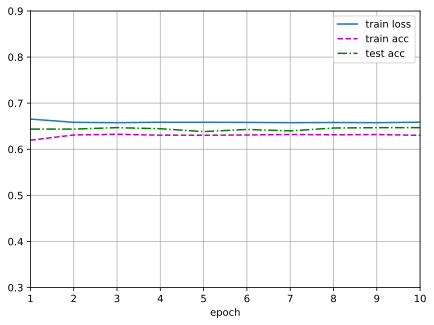

In [49]:
train_loss, train_acc, test_acc = train(net, train_iter, test_iter, loss, num_epochs, trainer)

In [44]:
print('训练损失：', train_loss)
print('训练精度：', train_acc)
print('测试集精度：', test_acc)

训练损失： 0.6597411717687335
训练精度： 0.6318824404761905
测试集精度： 0.646875


In [45]:
def predict(net, test_iter, n=10):
    for X, y in test_iter:
        break
    trues = get_label(y.cpu().numpy())[0:n]
    preds = get_label(net(X).argmax(axis=1).cpu().numpy())[0:n]
    correct_num = 0
    for i in range(n):
        print('真实标签为：', trues[i], '预测标签为：', preds[i])
        if trues[i] == preds[i]:
            correct_num += 1
    print('预测准确率为：', correct_num / n)    


In [46]:
predict(net, test_iter)

真实标签为： 标准 预测标签为： 标准
真实标签为： 标准 预测标签为： 标准
真实标签为： 标准 预测标签为： 标准
真实标签为： 标准 预测标签为： 标准
真实标签为： 标准 预测标签为： 标准
真实标签为： 异常 预测标签为： 标准
真实标签为： 异常 预测标签为： 标准
真实标签为： 标准 预测标签为： 标准
真实标签为： 标准 预测标签为： 标准
真实标签为： 异常 预测标签为： 标准
预测准确率为： 0.7
